### Prosper Loan Data Exploration

In this project I am going to explore the loan data. I haven't yet assessed the data, so there is no specific goal at the moment but I will be looking out for default and completed loans to see if I can see patterns between them.

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline 

In [180]:
#Importing CSV and looking at columns
df = pd.read_csv("prosperLoanData.csv")
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [181]:
#Looking to see loan status types
df["LoanStatus"].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

Seems like there is enough data to look into relationships for defaulted loans. I will look into if there could be any patterns in the defaulted loans.

In [182]:
#Looking into the credit grade types
df["CreditGrade"].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [183]:
#Making new variable for defaulted loans
defaulted = df.query("LoanStatus == 'Defaulted'")
#Checking to see there is 5018
defaulted.shape

(5018, 81)

In [184]:
#double check no duplicate loans (Done with cleaning which isn't included in this project)
defaulted.nunique()

ListingKey                     5018
ListingNumber                  5018
ListingCreationDate            5018
CreditGrade                       8
Term                              3
                               ... 
PercentFunded                    18
Recommendations                   6
InvestmentFromFriendsCount        4
InvestmentFromFriendsAmount      49
Investors                       501
Length: 81, dtype: int64

In [185]:
#Looking at value counts to see if there is a relation 
defaulted["CreditGrade"].value_counts()


HR    891
C     729
D     684
E     665
B     493
A     283
AA    201
NC     64
Name: CreditGrade, dtype: int64

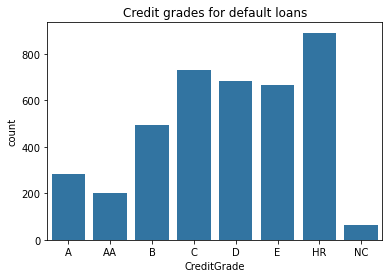

In [318]:
#Exploring relations
base_color = sb.color_palette()[0]
sb.countplot(data=defaulted,x="CreditGrade",order=["A","AA","B","C","D","E","HR","NC"],color=base_color).set_title("Credit grades for default loans");

Seems like a pattern with the lower grades defaulting. More lower grade loans are defaulting. I will explore this more and compare it to the overall data, then look to see if there are any of factors relating to default loans.

In [187]:
#Looking at it in terms of %

defaulted["CreditGrade"].value_counts(normalize=True)


HR    0.222195
C     0.181796
D     0.170574
E     0.165835
B     0.122943
A     0.070574
AA    0.050125
NC    0.015960
Name: CreditGrade, dtype: float64

In [189]:
#Looking to see if recommendations could have a factor
defaulted["Recommendations"].value_counts()


0    4697
1     277
2      35
3       7
7       1
4       1
Name: Recommendations, dtype: int64

In [190]:
#As a percentage
defaulted["Recommendations"].value_counts(normalize=True)

0    0.936030
1    0.055201
2    0.006975
3    0.001395
7    0.000199
4    0.000199
Name: Recommendations, dtype: float64

In [191]:
#Comparing it to overall
df["Recommendations"].value_counts()

0     109678
1       3516
2        568
3        108
4         26
5         14
9          6
7          5
6          4
8          3
16         2
18         2
24         1
14         1
19         1
21         1
39         1
Name: Recommendations, dtype: int64

In [192]:
df["Recommendations"].value_counts(normalize=True)
#It is slightly lower but can not draw conclusions from this data

0     0.962620
1     0.030859
2     0.004985
3     0.000948
4     0.000228
5     0.000123
9     0.000053
7     0.000044
6     0.000035
8     0.000026
16    0.000018
18    0.000018
24    0.000009
14    0.000009
19    0.000009
21    0.000009
39    0.000009
Name: Recommendations, dtype: float64

In [193]:
#Will look into if term has any patterns in default loans
defaulted["Term"].value_counts()

36    4822
60     186
12      10
Name: Term, dtype: int64

In [194]:
df["Term"].value_counts()
#Seems like 36 months is the most popular overall loan, so it would be hard to draw any conclusions

36    87778
60    24545
12     1614
Name: Term, dtype: int64

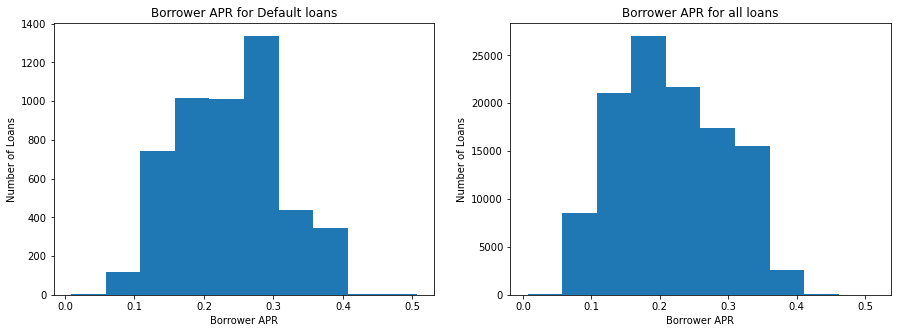

In [295]:
#Now will look into the interest/APR
#Using a his as it's a distibution of numeric variables
#Comparing default to all loans
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
plt.hist(defaulted["BorrowerAPR"]);
plt.title("Borrower APR for Default loans")
plt.xlabel("Borrower APR");
plt.ylabel("Number of Loans");

plt.subplot(1, 2, 2)
plt.hist(df["BorrowerAPR"]);
plt.title("Borrower APR for all loans")
plt.xlabel("Borrower APR");
plt.ylabel("Number of Loans");

It's possible moe data will be needed but from the histograms it looks like a higher APR could increase the liklihood of a default loan.

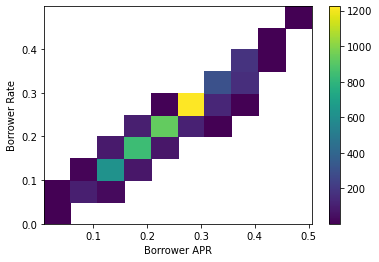

In [197]:
#Will look into APR and rate
#Plotting a heatmap 
plt.hist2d(data=defaulted,x="BorrowerAPR",y="BorrowerRate",cmin = 0.5);
plt.colorbar();
plt.xlabel("Borrower APR");
plt.ylabel("Borrower Rate");

The heat map shows similar results to the previous histograms, this time plotted against borrower rate. There is a relationship between the two but they're similar rates so that is expected.

In [253]:
#Will look into employment status to see if there is a strong link between default loans
defaulted["EmploymentStatus"].value_counts()

Full-time        2217
Not available    1204
Employed          630
Self-employed     246
Part-time          60
Retired            58
Other              54
Not employed       27
Name: EmploymentStatus, dtype: int64

In [254]:
#Now a look into income
defaulted["IncomeRange"].value_counts()
#Not enough data to visualise and explore

Not displayed     1747
$25,000-49,999    1290
$50,000-74,999     874
$75,000-99,999     375
$1-24,999          334
$100,000+          322
$0                  51
Not employed        25
Name: IncomeRange, dtype: int64

In [280]:
#Will look into the loan amounts because maybe that is the main factor for HR as income doesn't seem to be 
defaulted["LoanOriginalAmount"]


15        4000
23        2000
107       4000
128       1000
138       3000
          ... 
113840    1400
113847    8000
113914    3000
113918    7000
113926    3000
Name: LoanOriginalAmount, Length: 5018, dtype: int64

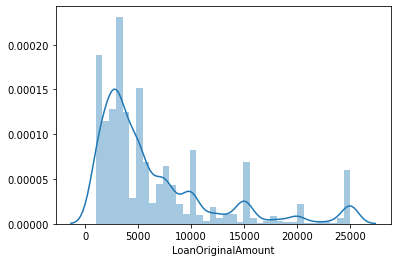

In [282]:
#Looking to see the most common loan amounts for default
sb.distplot(defaulted["LoanOriginalAmount"]);

The plot above shows the amount of default loans are mostly under $5000. 

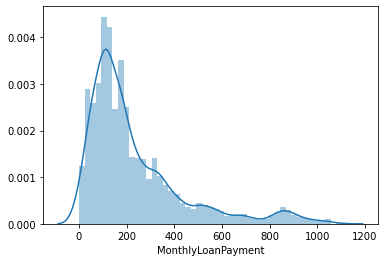

In [284]:
#Looking into monthly payments
sb.distplot(defaulted["MonthlyLoanPayment"]);

This shows the monthly payment for the loans that were defaulted, can see that the majority are below $200 a month. Both of these show that it may not be the amount being borrowed but possibly other factors.

In [269]:
#Now I will look into the propsper score to see relations to loan grades and defaults
defaulted["ProsperScore"].value_counts()


6.0     173
5.0     165
8.0     139
7.0     135
4.0     119
3.0      75
9.0      71
2.0      70
1.0      37
10.0     20
11.0      1
Name: ProsperScore, dtype: int64

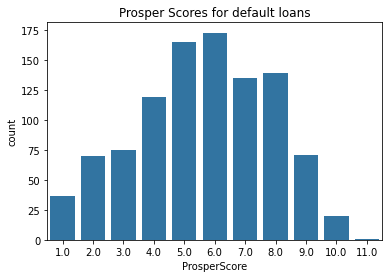

In [317]:
#Visually looking into prosper score
sb.countplot(data=defaulted,x="ProsperScore",color=base_color).set_title("Prosper Scores for default loans");

Can see for the defaulted loans above that the majority have an average prosper score around 5/6. 

In [323]:
#Checking score percentage to compare with current later
defaulted["ProsperScore"].value_counts(normalize=True)

6.0     0.172139
5.0     0.164179
8.0     0.138308
7.0     0.134328
4.0     0.118408
3.0     0.074627
9.0     0.070647
2.0     0.069652
1.0     0.036816
10.0    0.019900
11.0    0.000995
Name: ProsperScore, dtype: float64

The plot above shows for the whole data. Compared to the previous, it's visible that that a higher prosper score significantly descreases the likelihood of them defaulting.

In [198]:
#I want to look into current loans and see if there is any loans with similar patterns as the defaulted ones
#First will quickly look into completed loans


In [204]:
completed = df.query("LoanStatus == 'Completed'")
completed.shape

(38074, 81)

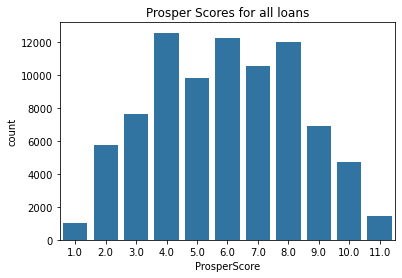

In [315]:
#For all data and prosper score
sb.countplot(data=df,x="ProsperScore",color=base_color).set_title("Prosper Scores for all loans");


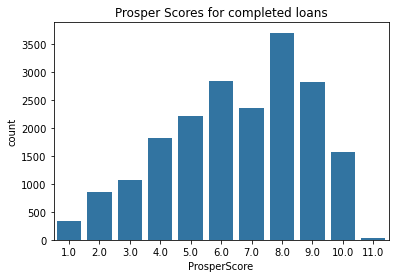

In [314]:
#Comment on plot above is below
#Want to look into Prosper Score, different distribution to previous ones. 
#This is left skewed 
sb.countplot(data=completed,x="ProsperScore",color=base_color).set_title("Prosper Scores for completed loans");

The two plots above shows for the whole data. Compared to the previous, it's visible that that a higher prosper score significantly descreases the likelihood of them defaulting. The completed loan plot is left skewed, unlike the others that take more of a normal distribution.

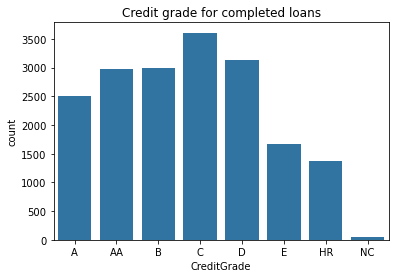

In [316]:
sb.countplot(data=completed,x="CreditGrade",order=["A","AA","B","C","D","E","HR","NC"],color=base_color).set_title("Credit grade for completed loans");

You can see a clear difference in credit grades and completed loans. This is weighted towards the higher end of the grades.

In [209]:
completed["CreditGrade"].value_counts()

C     3609
D     3126
B     2987
AA    2969
A     2505
E     1678
HR    1372
NC      42
Name: CreditGrade, dtype: int64

In [218]:
#HR/E grades the lowest completed (expected)
completed["CreditGrade"].value_counts(normalize=True)

C     0.197343
D     0.170932
B     0.163331
AA    0.162347
A     0.136975
E     0.091754
HR    0.075022
NC    0.002297
Name: CreditGrade, dtype: float64

In [219]:
#Checking the overall amount of grades in % to make sure there isn't more HR(Should of done at the start really)
df["CreditGrade"].value_counts(normalize=True)

C     0.195109
D     0.177978
B     0.151591
AA    0.121196
HR    0.121162
A     0.114496
E     0.113598
NC    0.004870
Name: CreditGrade, dtype: float64

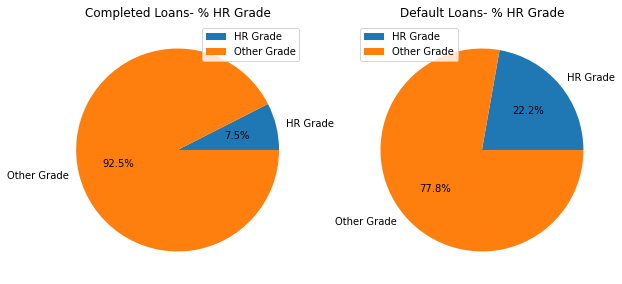

In [245]:
#Looking at % of HR grades completed vs default 

#% figures takens from 2 cells above
#First plot is completed loans
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
completed_HR = [0.075022,.924978]
plt.pie(completed_HR,labels = ["HR Grade","Other Grade"],autopct='%1.1f%%')
plt.title("Completed Loans- % HR Grade");
plt.legend();



#Default loans % taken from previous
plt.subplot(1, 2, 2)
default_HR =[0.222195,0.777805]
plt.pie(default_HR,labels = ["HR Grade","Other Grade"],autopct='%1.1f%%');
plt.title("Default Loans- % HR Grade");
plt.legend();

Seems like there is quite a big gap between the proportion of HR grade loans that were defaulted and completed.

In [299]:
#Will take a look into current loans and see if there could be any possible patterns to be catious about
current = df.query("LoanStatus == 'Current'")
current.shape
#There is no grade for current data

(56576, 81)

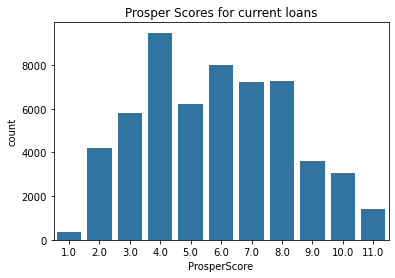

In [320]:
sb.countplot(data=current,x="ProsperScore",color=base_color).set_title("Prosper Scores for current loans");

A large portion of current loans are being borrowed by the middling scores. The 4 score stands out the most here.

In [324]:
#Checking score percentage 
current["ProsperScore"].value_counts(normalize=True)

4.0     0.167492
6.0     0.141067
8.0     0.128411
7.0     0.127439
5.0     0.109976
3.0     0.102588
2.0     0.074166
9.0     0.063843
10.0    0.053980
11.0    0.025081
1.0     0.005957
Name: ProsperScore, dtype: float64

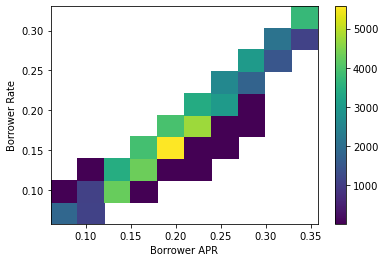

In [308]:
#Looking at APR and rates
plt.hist2d(data=current,x="BorrowerAPR",y="BorrowerRate",cmin = 0.5);
plt.colorbar();
plt.xlabel("Borrower APR");
plt.ylabel("Borrower Rate");

The heatmap with current loans shows the current ones being weighted towards a lower APR and borrower rate, which is a good sign for current loans.

In [311]:
#% of Prosper Scores for current loans 
current["ProsperScore"].value_counts(normalize=True)

4.0     0.167492
6.0     0.141067
8.0     0.128411
7.0     0.127439
5.0     0.109976
3.0     0.102588
2.0     0.074166
9.0     0.063843
10.0    0.053980
11.0    0.025081
1.0     0.005957
Name: ProsperScore, dtype: float64